# Data Science for Business Analytics
## Text and Sentiment Analysis

Student Name: Troy Manos

Student Netid: tpm293
***

### Part 1: Critique this plan
1\. After a few beers your CIO invited his buddy from Blue Moon consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Blue Moon, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Blue Moon says about the characteristics of your service is accurate.

Based on what we have covered in class and in the book, identify the four most serious weaknesses/flaws in this abridged version of Blue Moon's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Blue Moon Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Blue Moon) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

- Current word-of-mouth customers do not necessarily represent the full range of customers who will purchase the service. Due to the personal relationship nature of word-of-mouth marketing, these customers tend to be a fairly homogenous and rather small subset of the population and are probably not fully representative of all people willing to buy the product. Running a model on a larger dataset with the demographics of current customers will provide a list of potential customers who are interested in the service, but the list of unlikely customers will probably have a high false negative rate. Since the cost of not talking to a customer who will buy (the opportunity cost of a lost sale) is higher than the cost of talking to a customer who won't buy (the cost of the salesperson's time or the cost of marketing materials), taking an approach with a high false negative rate is not the best strategy. Instead, a new training set of data should be created by randomly reaching out to potential customers in the full dataset and recording their reaction to marketing efforts.
- Along the same lines as the first point, current word-of-mouth customers do not necessarily represent how much new customers from the population in general will purchase. Since these customers are relationship-based customers and feel more comfortable with the seller, they may purchase more. The best way to test the predictability of the model is to take the approach mentioned above and create a random training dataset.
- Even with good data about the demograhpics of the customers involved, the model may still fail to accurately predict sales if demographics are not predictive features for the service. For example, if people are purchasing this service on behalf of their employer, then information about the employer is likely more important than demographic information about the person making the purchase.
- Logistic regression may or may not be the best method to predict sales. Simply because it is "tried-and-true" does not mean that it will be better at determining who will buy the service than a more complext or less conventional method. Several different types of models should be constructed for the data and compared to determine which model works best.

### Part 2: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

### Part 3: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [58]:
import pandas as pd
data = pd.read_csv('data/imdb.csv', header=0)

2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [59]:
data['Y'] = data['Class'].apply(lambda x: (1 if x == 'P' else 0))
data.drop('Class', axis=1, inplace=True)

3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [60]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate CountVectorizer
binary_vectorizer = CountVectorizer(analyzer='word', binary=True, ngram_range=(1,2), stop_words='english')
binary_vectorizer.fit(X_train)

# Transform training and test data
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words='english')
tfidf_vectorizer.fit(X_train)

# Transform training and test data
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

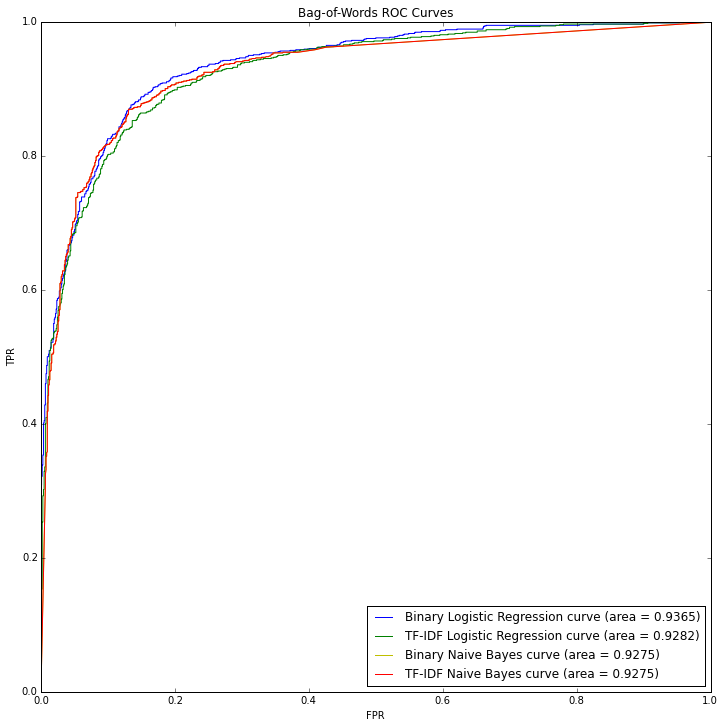

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import metrics

# Create Logistic Regression model for binary data, determine ROC Curve, calculate AUC, and add to plot
binary_log_model = linear_model.LogisticRegression()
binary_log_model.fit(X_train_binary, Y_train)
binary_log_fpr, binary_log_tpr, binary_log_thresholds = metrics.roc_curve(Y_test, binary_log_model.predict_proba(X_test_binary)[:,1])
binary_log_auc = metrics.auc(binary_log_fpr, binary_log_tpr)
plt.plot(binary_log_fpr, binary_log_tpr, label='Binary Logistic Regression curve (area = %0.4f)' % binary_log_auc, color='b')

# CreateLogistic Regression model for TF-IDF data, determine ROC Curve, calculate AUC, and add to plot
tfidf_log_model = linear_model.LogisticRegression()
tfidf_log_model.fit(X_train_tfidf, Y_train)
tfidf_log_fpr, tfidf_log_tpr, tfidf_log_thresholds = metrics.roc_curve(Y_test, tfidf_log_model.predict_proba(X_test_tfidf)[:,1])
tfidf_log_auc = metrics.auc(tfidf_log_fpr, tfidf_log_tpr)
plt.plot(tfidf_log_fpr, tfidf_log_tpr, label='TF-IDF Logistic Regression curve (area = %0.4f)' % tfidf_log_auc, color='g')

# Create Naive Bayes model for binary data, determine ROC Curve, calculate AUC, and add to plot
binary_bnb_model = naive_bayes.BernoulliNB()
binary_bnb_model.fit(X_train_binary, Y_train)
binary_bnb_fpr, binary_bnb_tpr, binary_bnb_thresholds = metrics.roc_curve(Y_test, binary_bnb_model.predict_proba(X_test_binary)[:,1])
binary_bnb_auc = metrics.auc(binary_bnb_fpr, binary_bnb_tpr)
plt.plot(binary_bnb_fpr, binary_bnb_tpr, label='Binary Naive Bayes curve (area = %0.4f)' % binary_bnb_auc, color='y')

# Create Naive Bayes model for TF-IDF data, determine ROC Curve, calculate AUC, and add to plot
tfidf_bnb_model = naive_bayes.BernoulliNB()
tfidf_bnb_model.fit(X_train_tfidf, Y_train)
tfidf_bnb_fpr, tfidf_bnb_tpr, tfidf_bnb_thresholds = metrics.roc_curve(Y_test, tfidf_bnb_model.predict_proba(X_test_tfidf)[:,1])
tfidf_bnb_auc = metrics.auc(tfidf_bnb_fpr, tfidf_bnb_tpr)
plt.plot(tfidf_bnb_fpr, tfidf_bnb_tpr, label='TF-IDF Naive Bayes curve (area = %0.4f)' % tfidf_bnb_auc, color='r')

# Specify plot info
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Bag-of-Words ROC Curves")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")

# Show plot
plt.show()

**The Logistic Regression model for the binary count vectorized data appears to be the best predictor, as it has an AUC of 0.9402. This is the simplest of the models, which could be the explanation for why it outperforms the other two models, but it is only marginally better.**

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. List the text below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [90]:
# Instantiate a new dataframe
reviews = pd.DataFrame({
        'text': X_test,
        'Y': Y_test,
        'predicted': binary_log_model.predict(X_test_binary)
    })

# Determine if prediction was correct
reviews['correct'] = reviews.apply(lambda x: (1 if x['predicted'] == x['Y'] else 0), axis=1)

# Remove correct predictions
reviews = reviews[reviews['correct']==0]

# Export to CSV for review
reviews.to_csv("reviews.csv")

**Review #1:** *Actually I liked this movie very very much. Not because of it's plot acting jokes no. I liked it because it's one of the worse movies ever created. It's so lame so bad that it becomes terribly funny. Some jokes are actually cool but the rest makes me pray for unemployment for the scriptwriter. Men in white are so dumb and stupid that you can do only two things. Turn the TV off or roll on the floor laughing (beer helps a lot:). I chose the second option.*

**Rating:** P
**Predicted:** N

**Reason:** This reviewer rated the movie positively, as he found the poor execution to be amusing. The review is filled with negative words, 

-----

**Review #2:** *I desperately want to give this movie a 10...I really do. Some movies especially horror movies are so budget that they are good. A wise-cracking ninja scarecrow who can implement corn cobs as lethal weaponry...definitely fits this budget to brilliance system. The depth of the movie is definitely its strong point and the twists and turns it implements keeping the audience at the edge of their seats really drives the creepy...ninja... puberty-stricken... pre-thirty year old student...non-cowboy drawing...wise-cracking...son-of-a-bitch scarecrow into the limelight as the creepiest horror icon of the year. All I can really say is can you dig it and recommend watching movies such as Frankenfish if you enjoy this sort of hilarious horror. (WHAT THE HELL WERE THEY SMOKING!?)*

**Rating:** N
**Predicted:** P

**Reason:** This review is filled with sarcastic language that appears to be positive, but actually has a negative connotation that is not communicated solely through the words chosen.

-----

**Review #3:** *'This is one of those unique horror films that requires a much more mature understanding of the word horror in order for it to be appreciated. The main thing people may fail to realize that this story is told through the point of view a little boy and as with most younger children he gets frightened easily. Mainly because he simply doesnt understand things like why his father is hardly ever there for him. From watching the film you can see the husband arguing with his wife the balance between work time and family time and you can easily understand it but the little boy doesnt. Also one can imagine the boy being afraid of the woods as it is established early on in the film that the family is from the city. Also in the beginning as the family is traveling to the house they hit a deer then get held up then they argue with the locals about it and the little boy surely didnt find this introduction to the woods pleasant at all. The Wendigo is ultimately what his young innocent mind fabricates to explain all of this. There is the American Indian legend but when looking at the scene where the young boy hears about about it it is explained to him like bluntly and simplistically. Not because thats what the Wendigo actually is but because that is how he understands it. When you look at the film from this point of view you can really begin to appreciate it. Obviously it was low-budget and shot cheaply but the jumping montages use of light and general eeriness more than make up for it. And the final question the film asks is: is it all in your head or is it really out there? 8/10 Rated R: profanity violence and a sex scene'*

**Rating:** P
**Predicted:** N

**Reason:** The reviewer discusses a number of reasons why many people might rate this movie poorly, but then justifies his positive rating by saying that the movie was shot on a budget and under the circumstances it wasn't a bad movie. Most of the language in the review as a whole leans toward negativity and is almost used as a contrast, but the final few sentences express the reviewer's true opinion.

-----

**Review #4:** *What a muddled mess. I saw this with a friend a while ago and we both consider ourselves open-minded to the many wonders of cinema but this sure isnt one of them. While there very well could be some good ideas/concepts and there are certainly some good performances (under the circumstances) it is all buried under random nonsense. Sir Anthony draws way too heavily from the same gene pool as Natural Born Killers U Turn and similar films as far as the editing is concerned or maybe he watched himself in Nixon for inspiration. Say what you want about David Lynch but at least he more often than not has a method to the madness. His quote of stating that he made the film as a joke says it all. Its not worth your money bandwidth or time.*

**Rating:** N
**Predicted:** P

**Reason:** The reviewer expresses displeasure with this movie via contrast by talking about what the movie isn't, so the review contains a fair amount of positive language, but the last sentence sums up the reviewer's displeasure. This shows the importance of context versus simply comparing the words used.

-----

**Review #5:** *'One star for the plot. One star for the acting. One star for the dubbing into squeaky-voiced American. Five stars for Monica Broeke and Inge Maria Granzow with their propensity for taking all their clothes off. And ten out of ten for the divine Emmanuelle BÃ©art two years before she made Manon des sources. BÃ©art also undresses a couple of times but even fully-clothed her presence is enough to make this film eminently watchable. Watch out for the scene where she tells her friend about the three first times for a girl. Its corny but still far more erotic than the rather laughably choreographed love scenes featuring Broeke Granzow and Patrick Bauchau. Incidentally the cinematography is not great; the stills for the closing credits are a better indication of what David Hamilton is capable of.'*

**Rating:** N
**Predicted:** P

**Reason:** This reviewer talks primarily about the few parts of the movie he enjoyed (the actresses undressing) for the majority of this review, though it is surprising that the model did not associate the bigram "one star" with a highly negative rating.